In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
tui = pd.read_csv('../Resources/tuition.csv')
tui

,yr,vc,harker,lbs,caa,stvic,stpat,stmar,stleo,stjo,...,al,hs,challs,calvary,champ,cds,sttho,stratford,lcs,basis
0,10,8830,24760,4700,9400,9500,5600,7350,6930,6000,...,6900,7050,14000,6600,11100,11700,6900,13200,6250,19800
1,11,9250,26040,4970,9850,10000,5900,7750,7210,6400,...,7230,7400,14500,6900,11700,12200,7250,13800,6600,20808
2,12,9800,27230,5220,10370,10600,6200,8100,7600,6700,...,7500,7800,15500,7120,12300,12800,7600,14520,6900,21500
3,13,10580,28500,5400,10800,11125,6500,8500,8023,7050,...,7900,8200,16300,7500,13000,13200,7990,15290,7240,23000
4,14,11030,30000,5700,11435,11500,6800,8900,8420,7400,...,8300,8340,17000,8020,13500,14150,8400,16000,7600,24080
5,15,11800,31680,6050,12000,12260,7200,9500,8800,7700,...,8820,9080,17500,8300,14200,14230,8800,16800,7900,25300
6,16,12400,33250,6200,12600,12870,7500,9800,9158,8100,...,9200,9500,18800,8760,15000,15600,9250,17650,8380,26500
7,17,13140,35000,6500,13200,13500,7900,10380,9670,8500,...,9600,10020,19600,9200,15500,16200,9700,18000,8800,27800
8,18,14380,36700,7000,13900,14200,8300,10900,10240,9000,...,10200,10520,20750,9750,16500,17200,10300,18990,9250,29280


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = tui.yr.values.reshape(-1, 1)
y = tui.sttim.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (9, 1) (9, 1)


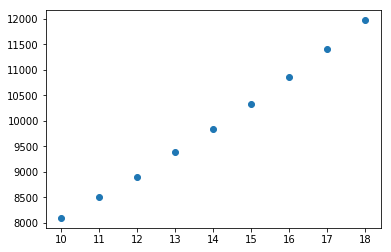

In [4]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[483.66666667]]
y-axis intercept:  [3152.]


In [8]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[10]]
Max X Value: [[18]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

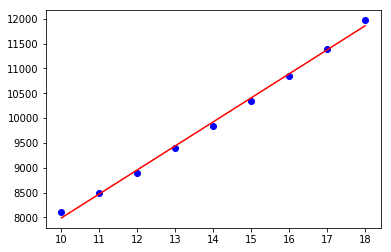

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4732.592592592599
R-squared (R2 ): 0.9969746044824532


In [12]:
model.score(X, y)

0.9969746044824532

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
model.score(X_test, y_test)

0.9985261033179949

In [16]:
predicted_19 = model.predict(19)
print(predicted_19)

[[12353.46938776]]


In [17]:
predicted_20 = model.predict(20)
print(predicted_20)

[[12838.97959184]]


In [18]:
predicted_21 = model.predict(21)
print(predicted_21)

[[13324.48979592]]


In [19]:
predicted_22 = model.predict(22)
print(predicted_22)

[[13810.]]


In [20]:
predicted_23 = model.predict(23)
print(predicted_23)

[[14295.51020408]]
